# **Setup**

## Import Required Packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import tensorflow.keras
from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Reshape, Input
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Note: Before running the code, make sure to change the data path to the current location of the data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the Data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/AI for CS/data2.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.columns = data.columns.str.strip()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 88 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Unnamed: 0                   1000000 non-null  int64  
 1   Flow ID                      1000000 non-null  object 
 2   Source IP                    1000000 non-null  object 
 3   Source Port                  1000000 non-null  int64  
 4   Destination IP               1000000 non-null  object 
 5   Destination Port             1000000 non-null  int64  
 6   Protocol                     1000000 non-null  int64  
 7   Timestamp                    1000000 non-null  object 
 8   Flow Duration                1000000 non-null  int64  
 9   Total Fwd Packets            1000000 non-null  int64  
 10  Total Backward Packets       1000000 non-null  int64  
 11  Total Length of Fwd Packets  1000000 non-null  float64
 12  Total Length of Bwd Packets  1000000 non-nu

In [ ]:
X = data.drop(columns=['Source IP', 'Destination IP', 'Timestamp', 'Label', 'Flow ID', 'Unnamed: 0', 'SimillarHTTP'], axis= 1)
y = data['Label']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 81 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Source Port                  1000000 non-null  int64  
 1   Destination Port             1000000 non-null  int64  
 2   Protocol                     1000000 non-null  int64  
 3   Flow Duration                1000000 non-null  int64  
 4   Total Fwd Packets            1000000 non-null  int64  
 5   Total Backward Packets       1000000 non-null  int64  
 6   Total Length of Fwd Packets  1000000 non-null  float64
 7   Total Length of Bwd Packets  1000000 non-null  float64
 8   Fwd Packet Length Max        1000000 non-null  float64
 9   Fwd Packet Length Min        1000000 non-null  float64
 10  Fwd Packet Length Mean       1000000 non-null  float64
 11  Fwd Packet Length Std        1000000 non-null  float64
 12  Bwd Packet Length Max        1000000 non-nu

In [ ]:
print("Labels are: ",y.unique())
print('Number of samples in each class = \n', y.value_counts())

Labels are:  ['BENIGN' 'DrDoS_DNS' 'DrDoS_LDAP' 'DrDoS_MSSQL' 'DrDoS_NTP'
 'DrDoS_NetBIOS' 'DrDoS_SNMP' 'DrDoS_SSDP' 'DrDoS_UDP' 'Syn' 'UDP-lag']
Number of samples in each class = 
 Syn              99619
DrDoS_SSDP       99245
DrDoS_SNMP       98507
DrDoS_LDAP       98408
DrDoS_NetBIOS    98313
DrDoS_MSSQL      98014
DrDoS_UDP        97873
DrDoS_DNS        96646
UDP-lag          96316
DrDoS_NTP        85729
BENIGN           31330
Name: Label, dtype: int64


Split the data to train, validation and test with ratio 0.5:0.25:0.25.

In [ ]:
X_train, X_t, y_train, y_t = train_test_split(X, y, test_size=0.5, random_state=0, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_t, y_t, test_size=0.5, random_state=0, stratify=y_t)

# **Data Preprocessing**

## Scaling

Feature scaling using Min-Max scaling with range (0, 255)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 255))
X_train_sc = scaler.fit_transform(X_train)
X_val_sc = scaler.transform(X_val)
X_test_sc = scaler.transform(X_test)

## One-hot encoding

One-hot encode the labels to match the format of the model's predictions.

In [ ]:
ohe = OneHotEncoder()
y_train_enc = ohe.fit_transform(y_train.to_numpy().reshape(-1, 1)).toarray()
y_val_enc = ohe.transform(y_val.to_numpy().reshape(-1, 1)).toarray()
y_test_enc = ohe.transform(y_test.to_numpy().reshape(-1, 1)).toarray()

# **CNN model**

## Model Creation

In [ ]:
cnn_model = tf.keras.Sequential()
cnn_model.add(Input(shape=(81,)))
cnn_model.add(Reshape((9,9,1)))
cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64,activation="relu"))
cnn_model.add(Dense(32,activation="relu"))
cnn_model.add(Dense(units=11, activation='softmax'))
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 9, 9, 1)           0         
                                                                 
 conv2d (Conv2D)             (None, 9, 9, 128)         1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          73792     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 64)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                    

## Model Training

In [ ]:
batchSize = 128
nEpochs = 80

cnn_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history = cnn_model.fit(X_train_sc, y_train_enc, batch_size=batchSize, epochs=nEpochs, verbose=1, validation_data=(X_val_sc, y_val_enc))

Epoch 1/80
3907/3907 [==============================] - 32s 6ms/step - loss: 0.7072 - accuracy: 0.6561 - val_loss: 0.6316 - val_accuracy: 0.6794
Epoch 2/80
3907/3907 [==============================] - 23s 6ms/step - loss: 0.6349 - accuracy: 0.6776 - val_loss: 0.6272 - val_accuracy: 0.6788
Epoch 3/80
3907/3907 [==============================] - 23s 6ms/step - loss: 0.6197 - accuracy: 0.6823 - val_loss: 0.6126 - val_accuracy: 0.6847
Epoch 4/80
3907/3907 [==============================] - 23s 6ms/step - loss: 0.6122 - accuracy: 0.6857 - val_loss: 0.6015 - val_accuracy: 0.6843
Epoch 5/80
3907/3907 [==============================] - 23s 6ms/step - loss: 0.6081 - accuracy: 0.6877 - val_loss: 0.6070 - val_accuracy: 0.6912
Epoch 6/80
3907/3907 [==============================] - 23s 6ms/step - loss: 0.6052 - accuracy: 0.6888 - val_loss: 0.6122 - val_accuracy: 0.6849
Epoch 7/80
3907/3907 [==============================] - 23s 6ms/step - loss: 0.6021 - accuracy: 0.6912 - val_loss: 0.5968 - val_ac

Save the trained model to be able to reuse it in the hybrid model. 

In [ ]:
cnn_model.save("cnn_model.h5")

## Model Testing and Evaluation

Plot accuracy curves of the train and validation datasets.

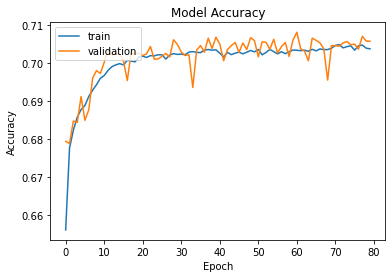

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Plot loss curves of the train and validation datasets.

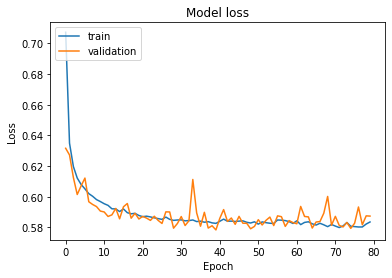

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Predictions

In [ ]:
y_train_pred_prob = cnn_model.predict(X_train_sc)
y_train_pred = y_train_pred_prob.argmax(axis=-1)

y_val_pred_prob = cnn_model.predict(X_val_sc)
y_val_pred = y_val_pred_prob.argmax(axis=-1)

y_pred_prob = cnn_model.predict(X_test_sc)
y_pred = y_pred_prob.argmax(axis=-1)

**The classes' labels are mapped to the numbers as follows:**

BENIGN ---> 0

DrDoS_DNS ---> 1

DrDoS_LDAP ---> 2

DrDoS_MSSQL ---> 3

DrDoS_NTP ---> 4

DrDoS_NetBIOS ---> 5

DrDoS_SNMP ---> 6

DrDoS_SSDP ---> 7

DrDoS_UDP ---> 8

Syn ---> 9

UDP-lag ---> 10

Evaluate the model's perofrmance on the test dataset by metrics in the classification report (accuracy, precision, recall, f1-score) and by plotting the confusion matrix.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7833
           1       0.66      0.47      0.55     24162
           2       0.55      0.52      0.54     24602
           3       0.96      0.97      0.96     24503
           4       0.99      1.00      0.99     21432
           5       0.95      0.98      0.97     24578
           6       0.65      0.85      0.74     24626
           7       0.45      0.03      0.05     24812
           8       0.47      0.97      0.63     24469
           9       0.61      1.00      0.76     24904
          10       0.97      0.20      0.33     24079

    accuracy                           0.71    250000
   macro avg       0.75      0.73      0.68    250000
weighted avg       0.73      0.71      0.66    250000



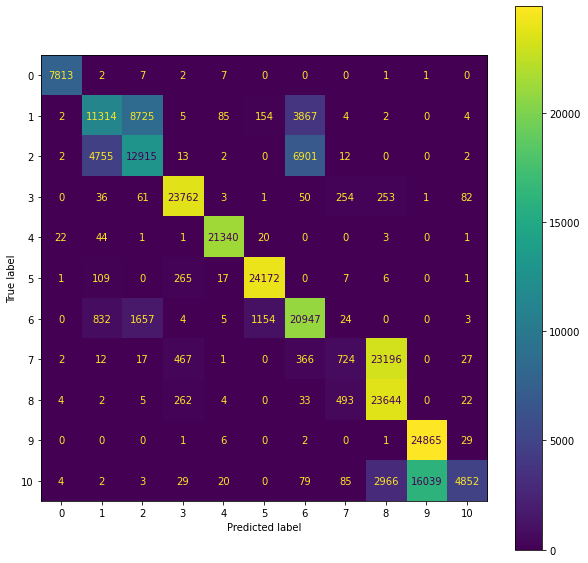

In [ ]:
print(classification_report(np.argmax(y_test_enc, axis=1), y_pred.argmax(axis=-1)))
conf_mx = confusion_matrix(np.argmax(y_test_enc, axis=1), y_test_pred.argmax(axis=-1))
fig, ax = plt.subplots(figsize=(10,10))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mx)
disp.plot(ax=ax)
plt.show()

Save the datasets and predictions to use for the training of the hybrid model.

In [ ]:
from numpy import savetxt

savetxt('X_train.csv', X_train_sc, delimiter=',')
savetxt('X_val.csv', X_val_sc, delimiter=',')
savetxt('X_test.csv', X_test_sc, delimiter=',')

savetxt('y_train.csv', y_train_enc, delimiter=',')
savetxt('y_val.csv', y_val_enc, delimiter=',')
savetxt('y_test.csv', y_test_enc, delimiter=',')

In [ ]:
savetxt('cnn_train.csv', y_train_pred_prob, delimiter=',')
savetxt('cnn_val.csv', y_val_pred_prob, delimiter=',')
savetxt('cnn_test.csv', y_pred_prob, delimiter=',')